In [5]:
# Housing loan Predication

In [6]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
train_df = pd.read_csv("train_file.csv")
test_df = pd.read_csv("test_file.csv")

In [8]:
train_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [9]:
test_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [10]:
test_df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [11]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [12]:
test_df.shape , train_df.shape

((367, 12), (614, 13))

In [13]:
# EDA 

In [14]:
# for univariate anlaysis for categoraical variable 

In [15]:
train_df['Gender'].value_counts(normalize=True)

Male      0.813644
Female    0.186356
Name: Gender, dtype: float64

In [16]:
train_df['Loan_Status'].value_counts(normalize=True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

Text(0.5, 0, 'Credit History')

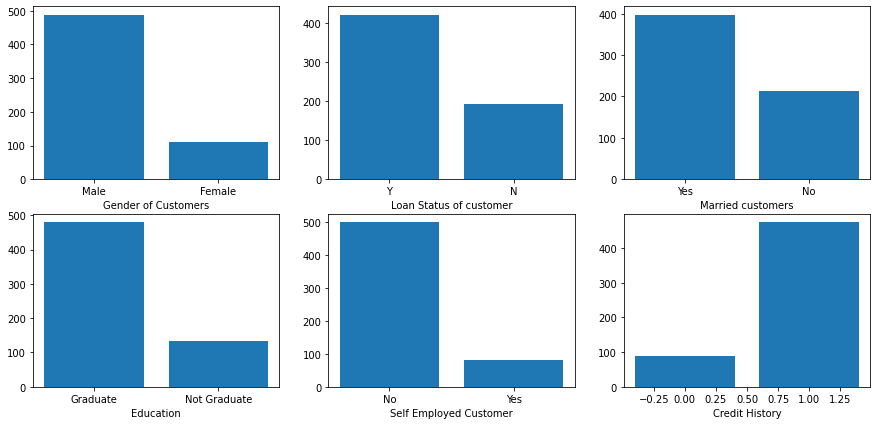

In [17]:
# categorical features

plt.figure(figsize=(15,7))

plt.subplot(2,3,1)
plt.bar(train_df['Gender'].value_counts().keys(),train_df['Gender'].value_counts())
plt.xlabel("Gender of Customers")

plt.subplot(2,3,2)

plt.bar(train_df['Loan_Status'].value_counts().keys(),train_df['Loan_Status'].value_counts())
plt.xlabel("Loan Status of customer")

plt.subplot(2,3,3)
plt.bar(train_df['Married'].value_counts().keys(),train_df["Married"].value_counts())
plt.xlabel("Married customers")

plt.subplot(2,3,4)
plt.bar(train_df['Education'].value_counts().keys(),train_df["Education"].value_counts())
plt.xlabel("Education")

plt.subplot(2,3,5)
plt.bar(train_df['Self_Employed'].value_counts().keys(),train_df["Self_Employed"].value_counts())
plt.xlabel("Self Employed Customer")

plt.subplot(2,3,6)
plt.bar(train_df['Credit_History'].value_counts().keys(),train_df["Credit_History"].value_counts())
plt.xlabel("Credit History")


C:\Users\Suraj\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Suraj\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ApplicantIncome'>

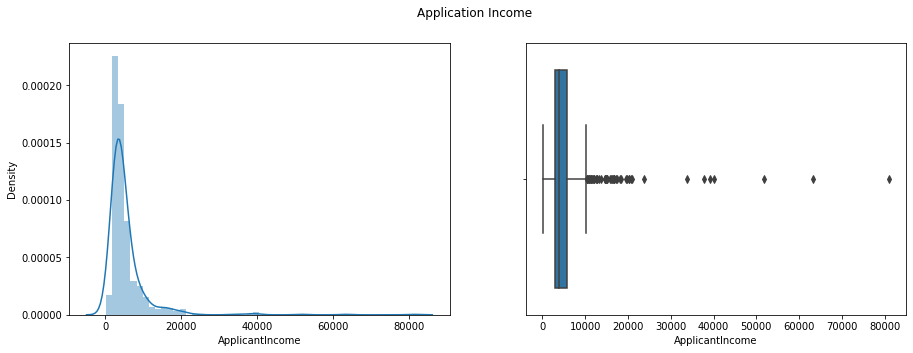

In [18]:
# Numerical Features 

fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(15,5))
fig.suptitle('Application Income')
sns.distplot(train_df['ApplicantIncome'],ax=ax1)
sns.boxplot(train_df["ApplicantIncome"],ax=ax2)


C:\Users\Suraj\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Suraj\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='CoapplicantIncome'>

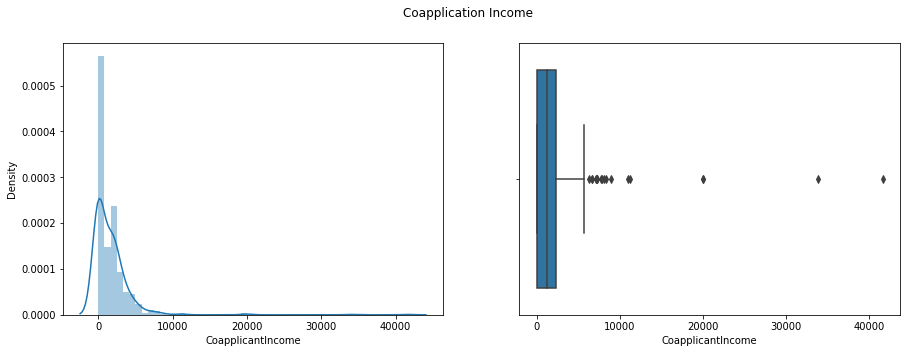

In [19]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(15,5))
fig.suptitle('Coapplication Income')
sns.distplot(train_df['CoapplicantIncome'],ax=ax1)
sns.boxplot(train_df["CoapplicantIncome"],ax=ax2)

C:\Users\Suraj\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Suraj\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='LoanAmount'>

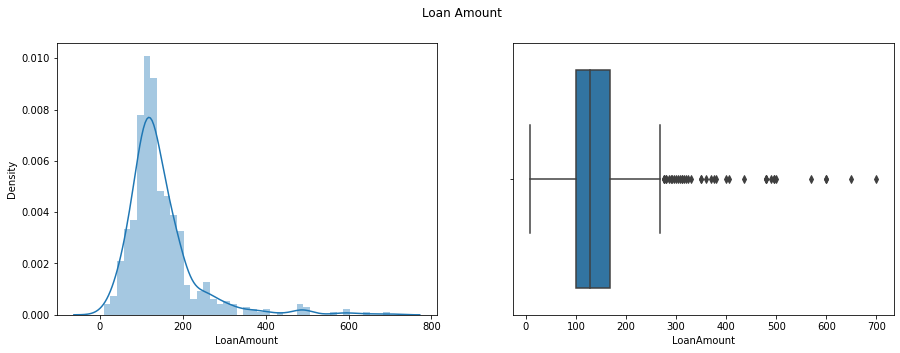

In [20]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(15,5))
fig.suptitle('Loan Amount')
sns.distplot(train_df['LoanAmount'],ax=ax1)
sns.boxplot(train_df["LoanAmount"],ax=ax2)

In [21]:
# for Bivariate anlaysis 

<AxesSubplot:xlabel='Credit_History'>

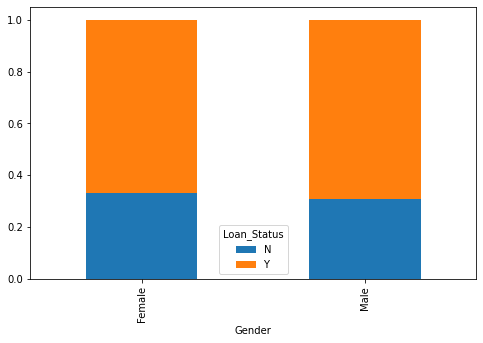

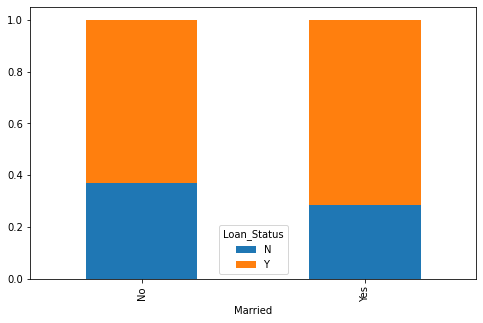

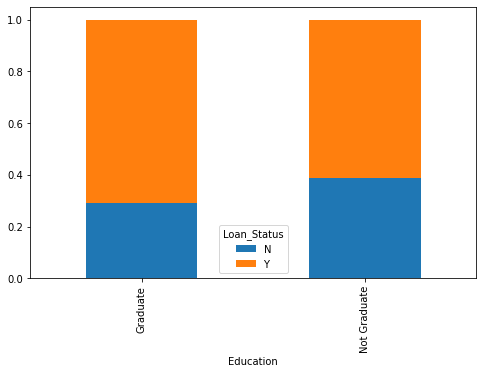

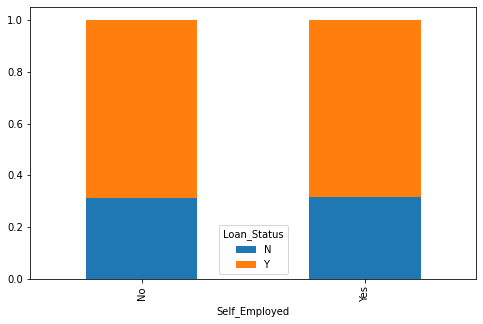

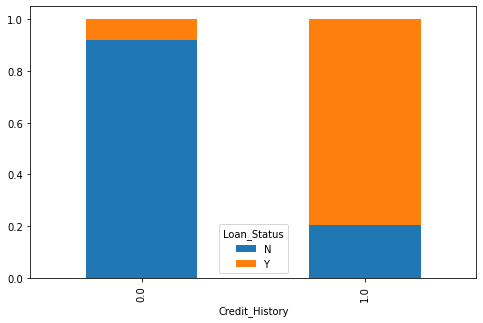

In [22]:
# Categorical vs dependent Variable

gender = pd.crosstab(train_df["Gender"],train_df["Loan_Status"])
married= pd.crosstab(train_df["Married"],train_df['Loan_Status'])
education= pd.crosstab(train_df["Education"],train_df['Loan_Status'])
self_employed = pd.crosstab(train_df["Self_Employed"],train_df["Loan_Status"])
credit_history = pd.crosstab(train_df["Credit_History"],train_df["Loan_Status"])



gender.div(gender.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(8,5))
married.div(married.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(8,5))
education.div(education.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(8,5))
self_employed.div(self_employed.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(8,5))
credit_history.div(credit_history.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(8,5))



In [23]:
#numerical bivariate feature


In [24]:
#Missing value Imputation

In [30]:
train_df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [31]:
# to check % of missing value in each features 
def percentageOFmissing(df):
    percentage_nan=0
    percentage_nan = 100 * df.isnull().sum()/len(df)
    percentage_nan =percentage_nan[percentage_nan>0].sort_values()
    return percentage_nan

In [33]:
percentage_nan=percentageOFmissing(train_df)
print(percentage_nan)

Married             0.488599
Gender              2.117264
Loan_Amount_Term    2.280130
Dependents          2.442997
LoanAmount          3.583062
Self_Employed       5.211726
Credit_History      8.143322
dtype: float64


C:\Users\Suraj\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'missing value features')

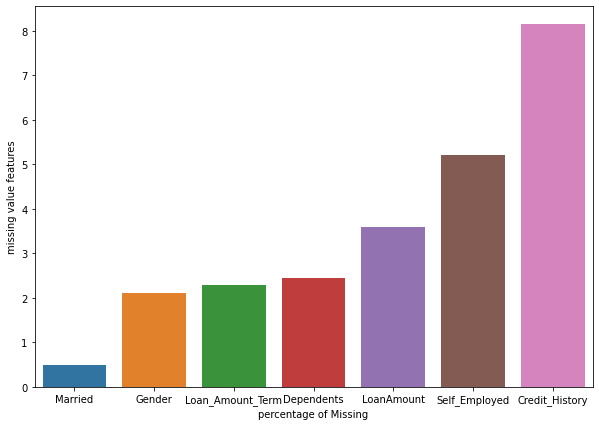

In [42]:
# visulizing missing value 
plt.figure(figsize=(10,7))
sns.barplot(percentage_nan.keys(),percentage_nan)
plt.xlabel("percentage of Missing")
plt.ylabel('missing value features')

In [ ]:
# Imputing the missing value for categorical 
train_df["Gender"].fillna(train_dfain_df["gender"].mode()[0],inplace=True)
train_df["Married"].fillna(train_df['Married'].mode()[0],inplace=True)
train_df["Credit_History"].fillna(train_df['Credit_History'].mode()[0],inplace=True)
train_df["Self_Employed"].fillna(train_df['Self_Employed'].mode()[0],inplace=True)
train_df["Dependents"].fillna(train_df['Dependents'].mode()[0],inplace=True)
